## Skript which uses the information of the different usable carbon sources and their comparison (FBA)

In [2]:
# imports
import cobra
import sys # append path
from cobra.flux_analysis import pfba # parsimonious FBA

sys.path.append('../scripts/')
import helperFunction as hf

config = hf.load_config()


# list of carbon sources
# Alanine: L-Alanine (second frequent AS), Methanol, Oleic acid, Glucose, Fructose, Trehalose, Sorbitol, Glycerol, CO2 productio, O2 production
# formulas: C3H7NO2, CH4O, C18H34O2, C6H12O6, C6H12O6, C12H22O11, C6H14O6, C3H8O3, CO2, O2 // all verified with wikipedia
# number of carbons: 3, 1, 18, 6, 6, 12, 6, 3, (1, 0)

# find reactions: list of reactions

## iYali4, iYli21


## iMT1026v3, iLC915

# perform FBA

In [3]:
# load models (iYli21, iYali4 (corrected), iMT1026v3 (read_write), iLC915 (MODEL1507))
iYli21 = cobra.io.read_sbml_model(config['models']['yli21'])
iYali4 = cobra.io.read_sbml_model(config['models']['yli4_corr'])
iMT1026v3 = cobra.io.read_sbml_model(config['models']['ppa1026v3'])
iLC915 = cobra.io.read_sbml_model(config['models']['ppaiLC915'])

## Find exchange reactions

### iYli21: check exchange reactions

In [3]:
# for exchange in iYli21.exchanges:
#     formula_with_names = hf.formulaWithNames(exchange)
#     print(exchange.id, exchange.name, formula_with_names, exchange.reaction, exchange.lower_bound, exchange.upper_bound)

# # Alanine, Methanol, Oleic acid, Glucose, Fructose, Trehalose, Sorbitol, Glycerol, CO2 productio, O2 production
# # R1196: alanine, - ,R1440: oleate exchange, R1070: glucose, R1013: Trehalose, R1209: Sorbitol (D-Glucitol), R1141: Glycerol, R1030: (CO2 production), R1287: (O2 production) 
yli21_carbon = ['R1196', '-', 'R1440', 'R1070', 'R1065', 'R1013', 'R1209', 'R1141'] # , 'R1030', 'R1287'

# triolein, tributyrin, hexadecane, oleic acid, glycerol, glucose
# triolein: R2273, tributyrin: R2275, hexadecane: R2272, oleate: R1440, glycerol: R1141, glucose: R1070

### iYali4: check exchange reactions

In [8]:
for exchange in iYali4.exchanges:
    formula_with_names = hf.formulaWithNames(exchange)
    print(exchange.id, exchange.name, formula_with_names, exchange.reaction, exchange.lower_bound, exchange.upper_bound)

# # Alanine, Methanol, Oleic acid, Glucose, Fructose, Trehalose, Sorbitol, Glycerol, CO2 productio, O2 production
yali4_carbon = ['1873', '-', '2189', '1714', '1709', '1650', '1712', '1808'] # , '1672', '1992'

# triolein, tributyrin, hexadecane, oleic acid, glycerol, glucose


Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.


1542 (1-3)-beta-D-glucan exchange (1-3)-beta-D-glucan[ex] -->  m510 -->  0.0 1000.0
1545 (R)-carnitine exchange (R)-carnitine[ex] -->  m1069 -->  0.0 0.0
1546 (R)-lactate exchange (R)-lactate[ex] -->  m1043 -->  0.0 1000.0
1547 (R)-mevalonate exchange (R)-mevalonate[ex] -->  m1018 -->  0.0 1000.0
1548 (R)-pantothenate exchange (R)-pantothenate[ex] -->  m1098 -->  0.0 0.0
1549 (R,R)-2,3-butanediol exchange (R,R)-2,3-butanediol_ActiveX VT_ERROR:[ex] -->  m1020 -->  0.0 0.0
1551 (S)-lactate exchange (S)-lactate[ex] -->  m1079 -->  0.0 1000.0
1552 (S)-malate exchange (S)-malate[ex] -->  m1130 -->  0.0 0.0
1553 1-(sn-glycero-3-phospho)-1D-myo-inositol exchange 1-(sn-glycero-3-phospho)-1D-myo-inositol[ex] -->  m1053 -->  0.0 0.0
1554 1-acylglycerophosphocholine exchange 1-acylglycerophosphocholine[ex] -->  m1133 -->  0.0 0.0
1563 2'-deoxyadenosine exchange 2'-deoxyadenosine[ex] -->  m1135 -->  0.0 0.0
1564 2'-deoxyguanosine exchange 2'-deoxyguanosine[ex] -->  m1137 -->  0.0 0.0
1565 2'-deoxy

### iLC915: check exchange reactions

In [25]:
for exchange in iLC915.exchanges:
    formula_with_names = hf.formulaWithNames(exchange)
    print(exchange.id, exchange.name, formula_with_names, exchange.reaction, exchange.lower_bound, exchange.upper_bound)

# # Alanine (L-alanine), Methanol, Oleic acid: (9Z)-Octadecenoic acid, Glucose, Fructose, Trehalose, Sorbitol, Glycerol, CO2 productio (drain: CO2 -->), O2 production (--> oxygen)
iLC915_carbon = ['r1126', 'r1158', 'r1161', 'r1145', 'r1144', 'r1173', 'r1170', 'r1148', 'r1137', 'r1160']

# definition: e.g. --> alpha-D-Glucose_C6H12O6 (CO2 drain: CO2 -->)

# triolein, tributyrin, hexadecane, oleic acid, glycerol, glucose


r1122 Uptake of (R)-Lactate  --> (R)-Lactate_C3H6O3  --> m1222 0.0 1000.0
r1123 Uptake of (S)-Lactate  --> (S)-Lactate_C3H6O3  --> m1220 0.0 1000.0
r1124 Uptake of Acetate  --> Acetate_C2H4O2  --> m453 0.0 1000.0
r1125 Uptake of Acyl-carrier protein  --> Acyl-carrier protein_HSR  --> m1332 0.0 1000.0
r1126 L-Alanine uptake or drain  <=> L-Alanine_C3H7NO2  <=> m1247 -1000.0 1000.0
r1127 Uptake of (S)(+)-Allantoin  --> (S)(+)-Allantoin_C4H6N4O3  --> m1229 0.0 1000.0
r1128 Uptake of D-Arabitol D-Arabitol_ -->  m1369 -->  0.0 1000.0
r1129 L-Arginine uptake or drain  <=> L-Arginine_C6H14N4O2  <=> m1250 -1000.0 1000.0
r1130 L-Asparagine uptake or drain  <=> L-Asparagine_C4H8N2O3  <=> m1252 -1000.0 1000.0
r1131 L-Aspartate uptake or drain  <=> L-Aspartate_C4H7NO4  <=> m1253 -1000.0 1000.0
r1132 Uptake of Biotin  --> Biotin_C10H16N2O3S  --> m1236 0.0 1000.0
r1133 Drain of biomass Biomass_ -->  m1226 -->  0.0 1000.0
r1135 Uptake of Cellobiose  --> Cellobiose_C12H22O11  --> m1228 0.0 1000.0
r113

### iMT1026v3: Exchange

In [6]:
for exchange in iMT1026v3.exchanges:
    formula_with_names = hf.formulaWithNames(exchange)
    print(exchange.id, exchange.name, formula_with_names, exchange.reaction, exchange.lower_bound, exchange.upper_bound)

# Alanine: L-Alanine (second frequent AS), Methanol, Oleic acid: octadecanoate, Glucose, Fructose, Trehalose, Sorbitol, Glycerol, CO2 productio, O2 production
iMT1026v3_carbon = ['Ex_ala_L', 'Ex_meoh', '-', 'Ex_glc_D', 'Ex_fru', 'Ex_tre', 'Ex_sbt_D', 'Ex_glyc'] # , 'Ex_co2', 'Ex_o2'
# Ex_ocdca: octadecanoate
# R_Ex_ocdcea: octadecenoate

Ex_h2o H2O exchange H2O <=>  h2o_e <=>  -1000.0 1000.0
Ex_tre Trehalose exchange Trehalose -->  tre_e -->  0.0 0.0
Ex_glc_D D-Glucose exchange D-Glucose -->  glc_D_e -->  0.0 0.0
Ex_asn_L L-Asparagine exchange L-Asparagine -->  asn_L_e -->  0.0 0.0
Ex_nh4 Ammonium exchange Ammonium <--  nh4_e <--  -1000.0 0.0
Ex_asp_L L-Aspartate exchange L-Aspartate -->  asp_L_e -->  0.0 0.0
Ex_fmn FMN exchange FMN -->  fmn_e -->  0.0 0.0
Ex_pi Phosphate exchange Phosphate <--  pi_e <--  -1000.0 0.0
Ex_ribflv Riboflavin exchange Riboflavin -->  ribflv_e -->  0.0 0.0
Ex_thmpp Thiamine diphosphate exchange Thiamine diphosphate -->  thmpp_e -->  0.0 0.0
Ex_h H+ exchange H+ <=>  h_e <=>  -1000.0 1000.0
Ex_thm Thiamine exchange Thiamine -->  thm_e -->  0.0 0.0
Ex_pc_SC Phosphatidylcholine, yeast-specific exchange Phosphatidylcholine, yeast-specific -->  pc_SC_e -->  0.0 0.0
Ex_faR Average fatty acid exchange Average fatty acid -->  faR_e -->  0.0 0.0
Ex_1agpc_SC 1-Acyl-sn-glycerol-3-phosphocholine, yeast-s

## Generating the data

In [26]:
# parameters
_verbose = True
_use_precomputed = False
_experiment_number = 8
_number_of_carbons = [3, 1, 18, 6, 6, 12, 6, 3]
_ppa_maintenance = 2.81 # according to iMT1026v3
_add_maintenance = True
_yli_maintenance = 7.8625

In [130]:
# set growth conditions for iLC915

# set growth condition for iMT1026v3

# compute the growth, CO2 and O2 yield

# compare with used carbons in Guo et al. 2022

### iLC915 (not functional model (no minimal growth rate and internal fluxes (discussion)))

In [27]:
# load model
iLC915 = cobra.io.read_sbml_model(config['models']['ppaiLC915'])

In [28]:
# prepares iLC915 if _verbose = True: it presents the coefficients of the most important reactions
print('iLC915 model: ')

# prepare iLC915: needed because of internal cycles and active reactions
# lower and upper bounds of several reactions should be set to zero according to supplementary material of 
constraints_2_zero = ['r66','r910','r1104','r239','r111','r106','r490','r791','r243','r252','r253','r307','r308','r404','r405','r1320','r639','r640','r641','r642','r649','r650','r651','r652','r645','r646','r643','r644','r653','r654','r655','r656','r534'] 
for rxn_id in constraints_2_zero:
    rxn = iLC915.reactions.get_by_id(rxn_id)
    rxn.bounds = (0,0)
# constraint formulate uptake because of not meaningful results
formulate_uptake = iLC915.reactions.get_by_id('r1143')
formulate_uptake.bounds = (0,0)
# important carbon sources (biotin, CO2, urea)
important_carbon = ['r1132','r1137','r1177']

# all carbon containing exchange reactions
carbon_exchange_rxns = ['r1122', 'r1123', 'r1124', 'r1126', 'r1127', 'r1129', 'r1130', 'r1131', 'r1132', 'r1134', 'r1135', 'r1137', 'r1138', 'r1139', 'r1140', 'r1141', 'r1144', 'r1145', 'r1146', 'r1147', 'r1148', 'r1149', 'r1151', 'r1152', 'r1153', 'r1154', 'r1155', 'r1156', 'r1157', 'r1158', 'r1161', 'r1162', 'r1163', 'r1165', 'r1167', 'r1168', 'r1170', 'r1172', 'r1173', 'r1174', 'r1175', 'r1176', 'r1177', 'r1178']

# set all carbon exchange reactions to 0 except important ones
for rxn_id in carbon_exchange_rxns:
    if rxn_id not in important_carbon:
        rxn = iLC915.reactions.get_by_id(rxn_id)
        rxn.bounds = (0,0)

# check definition of important rxns 
important_rxns = ['r1133', 'r1141', 'r1145', 'r1144', 'r1148', 'r1160', 'r1137', 'r1188']

if _verbose: 
    for rxn_id in important_rxns:
        rxn = iLC915.reactions.get_by_id(rxn_id)
        print(rxn.reactants, rxn.products, rxn.bounds)
        print(rxn_id, rxn.name, hf.formulaWithNames(rxn), 'rxn coefficient: ', rxn.get_coefficient(list(rxn.metabolites.keys())[0]))



iLC915 model: 
[<Metabolite m1226 at 0x29cf99ee0>] [] (0.0, 1000.0)
r1133 Drain of biomass Biomass_ -->  rxn coefficient:  -1.0
[<Metabolite m1218 at 0x29cf99d60>] [] (0, 0)
r1141 Ethanol uptake or drain Ethanol_C2H6O -->  rxn coefficient:  -1.0
[] [<Metabolite m2 at 0x29cf18970>] (0, 0)
r1145 Uptake of alpha-D-Glucose  --> alpha-D-Glucose_C6H12O6 rxn coefficient:  1.0
[] [<Metabolite m1334 at 0x29cfa49d0>] (0, 0)
r1144 Uptake of beta-D-Fructose  --> beta-D-Fructose_C6H12O6 rxn coefficient:  1.0
[] [<Metabolite m1238 at 0x29cfa40d0>] (0, 0)
r1148 uptake of glycerol  --> Glycerol_C3H8O3 rxn coefficient:  1.0
[] [<Metabolite m1232 at 0x29cf99040>] (0.0, 1000.0)
r1160 uptake of O2  --> Oxygen_O2 rxn coefficient:  1.0
[<Metabolite m1244 at 0x29cfa4280>] [] (0.0, 1000.0)
r1137 Drain of CO2 CO2_CO2 -->  rxn coefficient:  -1.0
[<Metabolite m1 at 0x29cc26d30>, <Metabolite m5 at 0x29cf189a0>] [<Metabolite m3 at 0x29cd9e160>, <Metabolite m7 at 0x29c8397c0>] (0.0, 1000.0)
r1188 Maintenance 2.26 A

In [29]:
biomass_rxn = 'r1339' # growth
# set objective: 
iLC915.objective = biomass_rxn

# set maintenance reaction
maintenance = 'r1188'
maintenance_rxn = iLC915.reactions.get_by_id(maintenance)
# maintenance_rxn.bounds = (_ppa_maintenance,_ppa_maintenance)
# maintenance_rxn.bounds = (1,1) # according to iLC915
maintenance_rxn.bounds = (1.2434,1.2434) # according to iLC915 (1.2434 * 2.26 = 2.81)

In [30]:
iLC915.summary()

Infeasible: None (infeasible).

In [31]:
iLC915_carbon = ['r1126', 'r1158', 'r1161', 'r1145', 'r1144', 'r1173', 'r1170', 'r1148'] # , 'r1137', 'r1160'
_number_of_carbons = [3, 1, 18, 6, 6, 12, 6, 3]


In [32]:
def revert_ilc915():
    iLC915_carbon = ['r1126', 'r1158', 'r1161', 'r1145', 'r1144', 'r1173', 'r1170', 'r1148'] # , 'R1030', 'R1287'
    for rxn_id in iLC915_carbon:
        if rxn_id == '-':
            continue
        rxn = iLC915.reactions.get_by_id(rxn_id)
        rxn.bounds = (0,0)

In [34]:
# integrate into function
iLC915_growth = []
iLC915_biomass_ylied = []

for i in range(len(_number_of_carbons)):
    carbon_number = _number_of_carbons[i]
    uptake_carbon = 1000/carbon_number
    carbon_rxn = iLC915.reactions.get_by_id(iLC915_carbon[i])
    carbon_rxn.bounds = (-uptake_carbon, uptake_carbon)
    print(carbon_rxn.name)
    try: 
        sol = pfba(iLC915)
    except:
        print('infeasible')
        iLC915_growth.append(0)
        iLC915_biomass_ylied.append(0)
        revert_ilc915()
        continue
    growth_rate = round(sol.fluxes[biomass_rxn],4)
    print(growth_rate) 
    biomass_yield = round(growth_rate/uptake_carbon,4)
    print(biomass_yield)
    iLC915_growth.append(growth_rate)
    iLC915_biomass_ylied.append(biomass_yield)
    revert_ilc915()


L-Alanine uptake or drain
13.1491
0.0394
uptake of methanol
8.8747
0.0089
Uptake of (9Z)-Octadecenoic acid
18.5102
0.3332
Uptake of alpha-D-Glucose
16.6677
0.1
Uptake of beta-D-Fructose
infeasible
Uptake of alpha,alpha-Trehalose
16.67
0.2
Uptake of D-Sorbitol
17.859
0.1072
uptake of glycerol
18.8556
0.0566


In [36]:
iLC915_growth # [13.1491, 8.8747, 18.5102, 16.6677, 0, 16.67, 17.859, 18.8556]
iLC915_biomass_ylied # [0.0394, 0.0089, 0.3332, 0.1, 0, 0.2, 0.1072, 0.0566]

[0.0394, 0.0089, 0.3332, 0.1, 0, 0.2, 0.1072, 0.0566]

In [12]:
# predictions 
carbon_number = 3
uptake_carbon = 1000/carbon_number
carbon_rxn = iLC915.reactions.get_by_id('r1148')
carbon_rxn.bounds = (-uptake_carbon, uptake_carbon)
print(carbon_rxn.name)
sol = pfba(iLC915)
growth_rate = round(sol.fluxes[biomass_rxn],4)
print(growth_rate) 
biomass_yield = round(growth_rate/uptake_carbon,4)
print(biomass_yield)
revert_ilc915()
# 0.0394, 0.0089, 0.3332, 0.1, 0, 0.2, 0.1072, 0.0566

uptake of glycerol
18.8556
0.0566


In [245]:
iLC915.summary()

Infeasible: None (infeasible).

In [133]:
# iLC915 simple example
iLC915.objective = 'r1339' # drain biomass and growth rate => same result
carbon_uptake = 10 # mmol/gDW/h
# glycerol uptake
glycerol_uptake = iLC915.reactions.get_by_id('r1148')
glycerol_uptake
# glycerol_uptake.bounds = (carbon_uptake,carbon_uptake)
# glycerol_uptake
# solution = iLC915.optimize()
# growth_rate = solution.objective_value # 1/h
# print(growth_rate)
# biomass_yield = growth_rate / carbon_uptake
# print(biomass_yield)
# iLC915.summary()

Reaction identifier,r1148
Name,uptake of glycerol
Memory address,0x2af9969d0
Stoichiometry,--> m1238 --> Glycerol_C3H8O3
GPR,
Lower bound,0.0
Upper bound,1000.0


In [134]:
# r1128 = iLC915.reactions.get_by_id('r1128')
# r1128
# r1133 = iLC915.reactions.get_by_id('r1133')
# r1133

# r1137 = iLC915.reactions.get_by_id('r1137')
# r1137

# r1150 = iLC915.reactions.get_by_id('r1150')
# r1150

# r1177 = iLC915.reactions.get_by_id('r1177')
# r1177

In [136]:
# outdated
# # iterate over growth condition according to experimental data and store resulting growth rate
# # rxns
# model_name = 'iLC915'
# biomass_reaction = 'r1133' # biomass
# glu_ex_rxn = 'r1145' # glucose
# fructose_ex_rxn = 'r1144' # fructose
# glycerol_ex_rxn = 'r1148' # glycerol
# o2_ex_rxn = 'r1160' # O2
# co2_ex_rxn = 'r1137' # CO2
# ethanol_ex_rxn = 'r1141' # ethanol
# arabitol_ex_rxn = 'r1128' # Arabitol/arabinitol
# maintenance = 'r1188' # maintenance: 2.9 in iMT1026v3 (0 in iLC915)
# # set objective function
# iLC915_model.objective = biomass_reaction

# iLC915_model.summary()

# # growth results
# iLC915_simulation_growth = []
# # with CO2 constraint: 0.087; without CO2 constraint: 0.0898
# iLC915_simulation_co2_prod = []
# iLC915_simulation_o2_prod = []


# with iLC915_model as model:
#     for exp_idx in range(_experiment_number):
#         # set bounds for glucose and oxygen uptake
#         glu_rxn = model.reactions.get_by_id(glu_ex_rxn) 
#         glu_rxn.bounds = (glucose_uptake[exp_idx], glucose_uptake[exp_idx]) # rxn is defined as: "--> glucose"
        
#         o2_rxn = model.reactions.get_by_id(o2_ex_rxn)
#         o2_rxn.bounds = (oxygen_uptake[exp_idx], oxygen_uptake[exp_idx]) # rxn is defined as: "--> oxygen"

#         # set maintenance
#         maintenance_rxn = model.reactions.get_by_id(maintenance)
#         # maintenance_rxn.bounds = (_ppa_maintenance,_ppa_maintenance)
#         # maintenance_rxn.bounds = (1,1) # according to iLC915
#         maintenance_rxn.bounds = (1.2434,1.2434) # according to iLC915 (1.2434 * 2.26 = 2.81)
#         # maintenance_rxn.bounds = (0,0)

#         # set ethanol production
#         ethanol_rxn = model.reactions.get_by_id(ethanol_ex_rxn)
#         if (ppa_ethanol_prod[exp_idx] == 1000): # reaction is defined as "ethanol -->"
#             ethanol_rxn.bounds = (0,1000)
#         else:
#             ethanol_rxn.bounds = (ppa_ethanol_prod[exp_idx], ppa_ethanol_prod[exp_idx])
        

#         # # set optional co2 uptake according to experimental data
#         # co2_rxn = model.reactions.get_by_id(co2_ex_rxn)
#         # co2_rxn.bounds = (ppa_co2_prod[exp_idx], ppa_co2_prod[exp_idx])

#         # get solution
#         solution = pfba(model)
#         print(f'Growth rate on {glucose_uptake[exp_idx]} mmol/h glucose: {round(solution.fluxes[biomass_reaction],4)}')
#         print(f'CO2 production on {glucose_uptake[exp_idx]} mmol/h glucose: {round(solution.fluxes[co2_ex_rxn],4)}')

#         # store growth
#         iLC915_simulation_growth.append(round(solution.fluxes[biomass_reaction],4))
#         # store co2 production
#         iLC915_simulation_co2_prod.append(round(solution.fluxes[co2_ex_rxn],4))


### iMT1026v3

In [37]:
# prepare the model: no growth possible: missing carbon source
# show interesting reactions
model_name = 'iMT1026v3'
biomass_reaction = 'growth' # default: 'growth' biomass
glu_ex_rxn = 'Ex_glc_D' # glucose
maintenance = 'ATPM' # maintenance (set to 2.9 in iMT1026v3)
glycerol_ex_rxn = 'Ex_glyc' # glycerol
o2_ex_rxn = 'Ex_o2' # O2
co2_ex_rxn = 'Ex_co2' # CO2
fructose_ex_rxn = 'Ex_fru' # fructose
ethanol_ex_rxn = 'Ex_etoh' # ethanol
arabitol_ex_rxn = 'Ex_abt_D' # Arabitol/arabinitol

interesting_rxns = ['growth', 'Ex_glc_D', 'ATPM', 'Ex_glyc', 'Ex_o2', 'Ex_co2', 'Ex_fru', 'Ex_etoh', 'Ex_abt_D']

# check definition of interesting rxns
if _verbose:
    for rxn_id in interesting_rxns:
        rxn = iMT1026v3.reactions.get_by_id(rxn_id)
        print(rxn.reactants, rxn.products, rxn.bounds)
        print(rxn_id, rxn.name, hf.formulaWithNames(rxn), 'rxn coefficient: ', rxn.get_coefficient(list(rxn.metabolites.keys())[0]), rxn.bounds)

# remove glyc reaction as carbon source
glyc_rxn = iMT1026v3.reactions.get_by_id('Ex_glyc')
glyc_rxn.bounds = (0, 1000)

# add o2 bounds
o2_bounds = (-1000, 1000)
Ex_o2 = iMT1026v3.reactions.get_by_id(o2_ex_rxn)
Ex_o2.bounds = o2_bounds

try:
    iMT1026v3.summary() # not feasible => all good
    # raise error
    raise ValueError('Model behaves not as expected')
except:
    print('Model behaves as expected')

[<Metabolite biomass_c at 0x2a407ea30>] [<Metabolite biomass_e at 0x2a4070070>] (0.0, 1000.0)
growth Growth Biomass --> Biomass rxn coefficient:  -1.0 (0.0, 1000.0)
[<Metabolite glc_D_e at 0x2a0038fa0>] [] (0.0, 0.0)
Ex_glc_D D-Glucose exchange D-Glucose -->  rxn coefficient:  -1.0 (0.0, 0.0)
[<Metabolite h2o_c at 0x2a003c790>, <Metabolite atp_c at 0x2a0038280>] [<Metabolite h_c at 0x2a003c6d0>, <Metabolite pi_c at 0x2a003c4c0>, <Metabolite adp_c at 0x2a00381f0>] (2.9, 1000.0)
ATPM ATP maintenance requirement ATP + H2O --> ADP + H+ + Phosphate rxn coefficient:  -1.0 (2.9, 1000.0)
[<Metabolite glyc_e at 0x2a4070cd0>] [] (-1.0, 0.0)
Ex_glyc Glycerol exchange Glycerol <--  rxn coefficient:  -1.0 (-1.0, 0.0)
[<Metabolite o2_e at 0x2a4070e20>] [] (-1000.0, 0.0)
Ex_o2 Oxygen exchange Oxygen <--  rxn coefficient:  -1.0 (-1000.0, 0.0)
[<Metabolite co2_e at 0x2a4070c70>] [] (0.0, 1000.0)
Ex_co2 CO2 exchange CO2 -->  rxn coefficient:  -1.0 (0.0, 1000.0)
[<Metabolite fru_e at 0x2a4070220>] [] (0.

In [44]:
# iMT1026v3: iterate over growth condition according to experimental data and store resulting growth rate
# set objective function
iMT1026v3.objective = biomass_reaction


iMT1026v3_carbon = ['Ex_ala_L', 'Ex_meoh', 'Ex_ocdca', 'Ex_glc_D', 'Ex_fru', 'Ex_tre', 'Ex_sbt_D', 'Ex_glyc']

# growth results
iMT1026v3_simulation_growth = []
iMT1026v3_simulation_biomass_yield = []
iMT1026v3_simulation_co2_prod = []
iMT1026v3_simulation_o2_prod = []
if (not _use_precomputed):
    for exp_idx in range(_experiment_number):
        with iMT1026v3 as model:
            # set carbon source accroding to uptake reaction and set bounds according to carbon number
            carbon_rxn = model.reactions.get_by_id(iMT1026v3_carbon[exp_idx]) 
            uptake_rate = 1000/_number_of_carbons[exp_idx]
            carbon_rxn.bounds = (-uptake_rate, uptake_rate) # rxn is defined as: "glc_D_e -->"
            print(f'{iMT1026v3_carbon[exp_idx]} with {uptake_rate} mmol/gDW/h')

            # set maintenance
            maintenance_rxn = model.reactions.get_by_id(maintenance)
            maintenance_rxn.bounds = (_ppa_maintenance,_ppa_maintenance)
            # maintenance_rxn.bounds = (0,0)
            # maintenance_rxn.bounds = (2.26,2.26)

            # get solution
            try: 
                solution = pfba(model)
                growth = round(solution.fluxes[biomass_reaction],4)
                biomass_yield = round(growth/uptake_rate, 4)
                co2_prod = round(solution.fluxes[co2_ex_rxn],4)
                o2_prod = round(solution.fluxes[o2_ex_rxn],4)
            except:
                print('growth not possible')
                growth = 0
                biomass_yield = 0
                co2_prod = 0
                o2_prod = 0
            print(f'Growth rate on {iMT1026v3_carbon[exp_idx]} with {uptake_rate} mmol/gDW/h: {growth}')
            print(f'Biomass yield on {iMT1026v3_carbon[exp_idx]} with {uptake_rate} mmol/gDW/h: {biomass_yield}')
            print(f'CO2 production on {iMT1026v3_carbon[exp_idx]} with {uptake_rate} mmol/gDW/h: {co2_prod}')
            print(f'O2 production on {iMT1026v3_carbon[exp_idx]} with {uptake_rate} mmol/gDW/h: {o2_prod}')

            # store growth
            iMT1026v3_simulation_growth.append(growth)
            iMT1026v3_simulation_biomass_yield.append(biomass_yield)
            # store co2 production
            iMT1026v3_simulation_co2_prod.append(co2_prod)
            # store o2 production
            iMT1026v3_simulation_o2_prod.append(o2_prod)

    # # add results to value dicts
    # _growth_conditions[model_name] = iMT1026v3_simulation_growth
    # _co2_productions[model_name] = iMT1026v3_simulation_co2_prod


Ex_ala_L with 333.3333333333333 mmol/gDW/h
growth not possible
Growth rate on Ex_ala_L with 333.3333333333333 mmol/gDW/h: 0
Biomass yield on Ex_ala_L with 333.3333333333333 mmol/gDW/h: 0
CO2 production on Ex_ala_L with 333.3333333333333 mmol/gDW/h: 0
O2 production on Ex_ala_L with 333.3333333333333 mmol/gDW/h: 0
Ex_meoh with 1000.0 mmol/gDW/h
Growth rate on Ex_meoh with 1000.0 mmol/gDW/h: 9.226
Biomass yield on Ex_meoh with 1000.0 mmol/gDW/h: 0.0092
CO2 production on Ex_meoh with 1000.0 mmol/gDW/h: 206.591
O2 production on Ex_meoh with 1000.0 mmol/gDW/h: -466.912
Ex_ocdca with 55.55555555555556 mmol/gDW/h
Growth rate on Ex_ocdca with 55.55555555555556 mmol/gDW/h: 10.9062
Biomass yield on Ex_ocdca with 55.55555555555556 mmol/gDW/h: 0.1963
CO2 production on Ex_ocdca with 55.55555555555556 mmol/gDW/h: 380.7355
O2 production on Ex_ocdca with 55.55555555555556 mmol/gDW/h: -714.3613
Ex_glc_D with 166.66666666666666 mmol/gDW/h
Growth rate on Ex_glc_D with 166.66666666666666 mmol/gDW/h: 15.091

In [45]:
iMT1026v3_simulation_growth # [0, 9.226, 10.9062, 15.0914, 15.0914, 15.0952, 15.0914, 14.8574]
iMT1026v3_simulation_biomass_yield # [0, 0.0092, 0.1963, 0.0905, 0.0905, 0.1811, 0.0905, 0.0446]

[0, 0.0092, 0.1963, 0.0905, 0.0905, 0.1811, 0.0905, 0.0446]

In [139]:
# sanity check
# iMT1026v3.summary() 
# biomass_reaction = 'BIOMASS_glyc'
# iMT1026v3.objective = biomass_reaction
carbon_number = 1
uptake_carbon = 1000/carbon_number
# Ex_glyc = iMT1026v3.reactions.get_by_id('Ex_glyc')
# Ex_glyc.bounds = (-uptake_carbon,-uptake_carbon)
# Ex_glyc # glyc_e -->
# Ex_glc_D = iMT1026v3.reactions.get_by_id('Ex_glc_D')
# Ex_glc_D # glc_D_e -->
# Ex_ala_L = iMT1026v3.reactions.get_by_id('Ex_ala_L')
# Ex_ala_L.bounds = (uptake_carbon,uptake_carbon)
# Ex_ala_L # ala_L_e -->
# Ex_ala_D = iMT1026v3.reactions.get_by_id('Ex_ala_D')
# Ex_ala_D.bounds = (-uptake_carbon,-uptake_carbon)
# Ex_ala_D
Ex_meoh = iMT1026v3.reactions.get_by_id('Ex_meoh')
Ex_meoh.bounds = (-uptake_carbon,uptake_carbon)
Ex_meoh
iMT1026v3.summary() 

# sol = pfba(iMT1026v3)
# growth_rate = sol.fluxes[biomass_reaction]
# print(growth_rate)
# biomass_yield = growth_rate / uptake_carbon
# biomass_yield


Metabolite,Reaction,Flux,C-Number,C-Flux
btn_e,Ex_btn,9.225E-06,10,0.00%
fe2_e,Ex_fe2,9.225E-06,0,0.00%
meoh_e,Ex_meoh,529.6,1,100.00%
nh4_e,Ex_nh4,57.23,0,0.00%
o2_e,Ex_o2,466.9,0,0.00%
pi_e,Ex_pi,2.321,0,0.00%
so4_e,Ex_so4,0.4046,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
biomass_e,Ex_biomass,-9.225,0,0.00%
co2_e,Ex_co2,-206.6,1,100.00%


### iYli21

In [14]:
carbon_number = [3, 1, 18, 6, 6, 12, 6, 3]
yli21_carbon = ['R1196', '-', 'R1440', 'R1070', 'R1065', 'R1013', 'R1209', 'R1141'] # , 'R1030', 'R1287'


In [15]:
def revert_yli21():
    yli21_carbon = ['R1196', '-', 'R1440', 'R1070', 'R1065', 'R1013', 'R1209', 'R1141'] # , 'R1030', 'R1287'
    for rxn_id in yli21_carbon:
        if rxn_id == '-':
            continue
        rxn = iYli21.reactions.get_by_id(rxn_id)
        rxn.bounds = (0,0)

In [16]:
revert_yli21()

In [143]:
# iYli21.summary()

Infeasible: None (infeasible).

In [144]:
R1013 = iYli21.reactions.get_by_id('R1209')
R1013

Reaction identifier,R1209
Name,L-glucitol exchange
Memory address,0x2a7e9d6a0
Stoichiometry,m1289[e] --> L-glucitol_C6H14O6 -->
GPR,
Lower bound,0
Upper bound,0


In [ ]:
# R1164 = iYli21.reactions.get_by_id('R1164')
# R1164
# R1196 = iYli21.reactions.get_by_id('R1196')
# R1196

In [145]:
revert_yli21()
carbon_num = 3
uptake_carbon = 1000/carbon_num
carbon_rxn = iYli21.reactions.get_by_id('R1141')
carbon_rxn.bounds = (-uptake_carbon, uptake_carbon)
# if carbon_rxn_id == '-':
#     print('No carbon source')
#     # _yali4_biomass_yield.append(0)
#     continue
sol = pfba(iYli21)
growth_rate = round(sol.fluxes[biomass_rxn],4)
print(growth_rate) 
biomass_yield = round(growth_rate/uptake_carbon,4)
print(biomass_yield)
# 0.0554, 0, 0.3326, 0.1376, 0.1376, 0, 0, 0.0768

25.6036
0.0768


In [21]:
# iYli21:
print('iYli21_model')
# set objective
iYli21.objective = 'biomass_C'

glucose_exchange_reaction = 'R1070'
fructose_exchange_reaction = 'R1065'
biomass_reaction = 'biomass_C'
maintenance_reaction = 'xMAINTENANCE'
co2_ex_rxn = 'R1030'
o2_ex_rxn = 'R1287'

# remove glucose as carbon source
revert_yli21()

iYli21_simulation_growth = []
iYli21_simulation_biomass_yield = []
iYli21_simulation_o2 = []
iYli21_simulation_co2 = []
for exp_idx in range(_experiment_number):
    with iYli21 as model:
        try:
            model.summary()
            print('Model does not work as expected')
        except:
            print('Model works as expected')
            print('Simulation started...')
        if yli21_carbon[exp_idx] == '-':
            print('No carbon source')
            iYli21_simulation_growth.append(0)
            iYli21_simulation_co2.append(0)
            iYli21_simulation_o2.append(0)
            continue
        # set carbon source accroding to uptake reaction and set bounds according to carbon number
        carbon_rxn = model.reactions.get_by_id(yli21_carbon[exp_idx]) 
        uptake_rate = 1000/_number_of_carbons[exp_idx]
        carbon_rxn.bounds = (-uptake_rate, uptake_rate) # rxn is defined as: "glc_D_e -->"
        print(f'{yli21_carbon[exp_idx]} with {uptake_rate} mmol/gDW/h')
        # set carbon source accroding to uptake reaction and set bounds according to carbon number

        if _add_maintenance:
            maintenacne_reaction = model.reactions.get_by_id(maintenance_reaction) # m141[c] --> m143[c] + m35[c] => lower bound > 0
            maintenacne_reaction.bounds = (_yli_maintenance, _yli_maintenance)
        try: 
            solution = pfba(model)
            growth = round(solution.fluxes[biomass_reaction],4)
            biomass_yield = round(growth/uptake_rate, 4)
            co2_prod = round(solution.fluxes[co2_ex_rxn],4)
            o2_prod = round(solution.fluxes[o2_ex_rxn],4)
        except:
            print('growth not possible')
            biomass_yield = 0
            growth = 0
            co2_prod = 0
            o2_prod = 0
        print(f'Growth rate on {yli21_carbon[exp_idx]} with {uptake_rate} mmol/gDW/h: {biomass_yield}')
        print(f'CO2 production on {yli21_carbon[exp_idx]} with {uptake_rate} mmol/gDW/h: {co2_prod}')
        print(f'O2 production on {yli21_carbon[exp_idx]} with {uptake_rate} mmol/gDW/h: {o2_prod}')
        iYli21_simulation_growth.append(growth)
        iYli21_simulation_biomass_yield.append(biomass_yield)
        iYli21_simulation_co2.append(co2_prod)
        iYli21_simulation_o2.append(o2_prod)

iYli21_model
Model works as expected
Simulation started...
R1196 with 333.3333333333333 mmol/gDW/h
Growth rate on R1196 with 333.3333333333333 mmol/gDW/h: 0.0554
CO2 production on R1196 with 333.3333333333333 mmol/gDW/h: 376.4628
O2 production on R1196 with 333.3333333333333 mmol/gDW/h: -377.4516
Model works as expected
Simulation started...
No carbon source
Model works as expected
Simulation started...
R1440 with 55.55555555555556 mmol/gDW/h
Growth rate on R1440 with 55.55555555555556 mmol/gDW/h: 0.3326
CO2 production on R1440 with 55.55555555555556 mmol/gDW/h: 376.4723
O2 production on R1440 with 55.55555555555556 mmol/gDW/h: -673.4791
Model works as expected
Simulation started...
R1070 with 166.66666666666666 mmol/gDW/h
Growth rate on R1070 with 166.66666666666666 mmol/gDW/h: 0.1376
CO2 production on R1070 with 166.66666666666666 mmol/gDW/h: 226.3515
O2 production on R1070 with 166.66666666666666 mmol/gDW/h: -227.5785
Model works as expected
Simulation started...
R1065 with 166.6666

In [22]:
iYli21_simulation_growth # [18.4807, 0, 18.4804, 22.9298, 22.9298, 0, 0, 25.6036]
iYli21_simulation_biomass_yield # [0.0554, 0.3326, 0.1376, 0.1376, 0, 0, 0.0768]


[0.0554, 0.3326, 0.1376, 0.1376, 0, 0, 0.0768]

### iYali4

In [7]:
print(yali4_carbon)
print(_number_of_carbons)
_yli_maintenance

NameError: name 'yali4_carbon' is not defined

In [9]:
# # sanity check
# iYali4.summary()
# r1714 = iYali4.reactions.get_by_id('1714')
# r1714.bounds = (0,0)
# r1714
iYali4.summary()

# set maintenance
xMAINTENANCE = iYali4.reactions.get_by_id('xMAINTENANCE')
xMAINTENANCE.bounds = (_yli_maintenance, _yli_maintenance)

biomass_rxn = 'biomass_C'

In [150]:
# iYali4.summary()

In [10]:
def revert_yali4():
    iYali4rxns = ['1873', '-', '2189', '1714', '1709', '1650', '1712', '1808']
    for id in iYali4rxns:
        if id == '-':
            continue
        rxn = iYali4.reactions.get_by_id(id)
        rxn.bounds = (0,0)

In [152]:
# r1808 = iYali4.reactions.get_by_id('1712')
# r1808

In [11]:
carbon_yali4 = ['1873', '-', '2189', '1714', '1709', '1650', '1712', '1808']
carbon_number = [3, 1, 18, 6, 6, 12, 6, 3]

# set maintenance
xMAINTENANCE = iYali4.reactions.get_by_id('xMAINTENANCE')
xMAINTENANCE.bounds = (_yli_maintenance, _yli_maintenance)

biomass_rxn = 'biomass_C'

_experiment_number = len(carbon_yali4)
_yali4_biomass_yield = []
_yali4_growth_rate = []
for exp_idx in range(_experiment_number):
    revert_yali4()
    uptake_carbon = 1000/carbon_number[exp_idx]
    carbon_rxn_id = carbon_yali4[exp_idx]
    if carbon_rxn_id == '-':
        print('No carbon source')
        _yali4_biomass_yield.append(0)
        _yali4_growth_rate.append(0)
        continue
    # set glucose 
    carbon_rxn = iYali4.reactions.get_by_id(carbon_rxn_id)
    carbon_rxn.bounds = (-uptake_carbon, uptake_carbon)
    print(carbon_rxn.name)
    sol = pfba(iYali4)
    growth_rate = round(sol.fluxes[biomass_rxn],4)
    print(growth_rate) 
    _yali4_growth_rate.append(growth_rate)
    biomass_yield = round(growth_rate/uptake_carbon,4)
    print(biomass_yield)
    _yali4_biomass_yield.append(biomass_yield)
# round
# try: 
#     sol = pfba(iYali4)
#     growth = round(solution.fluxes[biomass_reaction],4)
#     biomass_yield = growth/uptake_carbon
#     co2_prod = round(solution.fluxes[co2_ex_rxn],4)
#     o2_prod = round(solution.fluxes[o2_ex_rxn],4)
# except:
#     print('growth not possible')
#     biomass_yield = 0
#     co2_prod = 0
#     o2_prod = 0
# print(biomass_yield)

# Alanine (L-Alanine)', 'Methanol', 'Oleic acid', 'Glucose', 'Fructose', 'Trehalose', 'Sorbitol', 'Glycerol']

# alanine, -, Oleic acid, glucose, fructose, Trehalose, sorbitol, glycerol
# 0.0568, 0, 0.3829, 0.1374, 0.1374, 0.2749, 0.1483, 0.0767

L-alanine exchange
18.9218
0.0568
No carbon source
oleate exchange
21.2723
0.3829
D-glucose exchange
22.9068
0.1374
D-fructose exchange
22.9068
0.1374
alpha,alpha-trehalose exchange
22.9097
0.2749
D-glucitol exchange
24.7162
0.1483
glycerol exchange
25.5554
0.0767


In [154]:
# how is it possible that there is zero growth?
# iYali4.summary()
# r1714 = iYali4.reactions.get_by_id('1714')
# r1714.bounds = (0, 0)
# r1714
# iYali4.summary()

# iYali4.summary()
# solution = pfba(iYali4)
# # pfba(iYali4)
sol = pfba(iYali4)
# sol.fluxes.to_csv('iYali4_fluxes.csv') # all fluxes are 0
# sol.fluxes['biomass_C'] == 0
# for reaction in iYali4.reactions:
#     if solution.fluxes[reaction.id] != 0:
#         print(reaction.id, solution.fluxes[reaction.id])
iYali4.objective = 'biomass_C'
r1714 = iYali4.reactions.get_by_id('1873') #glucose
uptake_rate = 1000/3
r1714.bounds = (-uptake_rate, -uptake_rate)
r1714
sol = pfba(iYali4)
sol.fluxes['biomass_C']

29.380442540197777

In [155]:
# yali4_carbon
iYali4.reactions.get_by_id('xMAINTENANCE')


Reaction identifier,xMAINTENANCE
Name,Non-growth associated maintenance (NGAM)
Memory address,0x2a9b071c0
Stoichiometry,m141 --> m143 + m35 ATP[cy] --> ADP[cy] + phosphate[cy]
GPR,
Lower bound,7.8625
Upper bound,7.8625


In [156]:
# outdated
# # iYali4:
# print('iYali4_model')

# # set objective
# iYali4.objective = 'biomass_C'

# # growth on glucose
# glucose_exchange_reaction = '1714'
# fructose_exchange_reaction = '1709'
# biomass_reaction = 'biomass_C'

# # maintenance
# maintenance_reaction = 'xMAINTENANCE'

# # remove glucose as carbon source
# R1070 = iYali4.reactions.get_by_id(glucose_exchange_reaction)
# R1070.bounds = (0,0)

# iYali4_simulation_growth = []
# iYali4_simulation_o2 = []
# iYali4_simulation_co2 = []
# for exp_idx in range(_experiment_number):
#     with iYali4 as model:
#         try:
#             model.summary()
#             if pfba(model).fluxes[biomass_reaction] == 0:
#                 # trow error
#                 raise Exception('No growth')
#             print('Model does not work as expected')
#         except:
#             print('Model works as expected')
#             print('Simulation started...')
#         if yali4_carbon[exp_idx] == '-':
#             print('No carbon source')
#             iYali4_simulation_growth.append(0)
#             iYali4_simulation_co2.append(0)
#             iYali4_simulation_o2.append(0)
#             continue
#         # set carbon source accroding to uptake reaction and set bounds according to carbon number
#         carbon_rxn = model.reactions.get_by_id(yali4_carbon[exp_idx]) 
#         uptake_rate = 1000/_number_of_carbons[exp_idx]
#         carbon_rxn.bounds = (-uptake_rate, uptake_rate) # rxn is defined as: "glc_D_e -->"
#         print(f'{carbon_rxn.name} with {uptake_rate} mmol/gDW/h')
#         # set carbon source accroding to uptake reaction and set bounds according to carbon number

#         if _add_maintenance:
#             maintenacne_reaction = model.reactions.get_by_id(maintenance_reaction) # m141[c] --> m143[c] + m35[c] => lower bound > 0
#             maintenacne_reaction.bounds = (_yli_maintenance, _yli_maintenance)
#             # maintenacne_reaction.bounds = (0, 1000)
#         try: 
#             solution = pfba(model)
#             growth = round(solution.fluxes[biomass_reaction],4)
#             biomass_yield = growth/uptake_rate
#             co2_prod = round(solution.fluxes[co2_ex_rxn],4)
#             o2_prod = round(solution.fluxes[o2_ex_rxn],4)
#         except:
#             print('growth not possible')
#             biomass_yield = 0
#             co2_prod = 0
#             o2_prod = 0
#         print(f'Growth rate on {yali4_carbon[exp_idx]} with {uptake_rate} mmol/gDW/h: {biomass_yield}')
#         print(f'CO2 production on {yali4_carbon[exp_idx]} with {uptake_rate} mmol/gDW/h: {co2_prod}')
#         print(f'O2 production on {yali4_carbon[exp_idx]} with {uptake_rate} mmol/gDW/h: {o2_prod}')
#         iYali4_simulation_growth.append(biomass_yield)
#         iYali4_simulation_co2.append(co2_prod)
#         iYali4_simulation_o2.append(o2_prod)

iYali4_model
Model does not work as expected
L-alanine exchange with 333.3333333333333 mmol/gDW/h
growth not possible
Growth rate on 1873 with 333.3333333333333 mmol/gDW/h: 0
CO2 production on 1873 with 333.3333333333333 mmol/gDW/h: 0
O2 production on 1873 with 333.3333333333333 mmol/gDW/h: 0
Model does not work as expected
No carbon source
Model does not work as expected
oleate exchange with 55.55555555555556 mmol/gDW/h
growth not possible
Growth rate on 2189 with 55.55555555555556 mmol/gDW/h: 0
CO2 production on 2189 with 55.55555555555556 mmol/gDW/h: 0
O2 production on 2189 with 55.55555555555556 mmol/gDW/h: 0
Model does not work as expected
D-glucose exchange with 166.66666666666666 mmol/gDW/h
growth not possible
Growth rate on 1714 with 166.66666666666666 mmol/gDW/h: 0
CO2 production on 1714 with 166.66666666666666 mmol/gDW/h: 0
O2 production on 1714 with 166.66666666666666 mmol/gDW/h: 0
Model does not work as expected
D-fructose exchange with 166.66666666666666 mmol/gDW/h
growth 

## Plotting Differences:
Goal: 
- barplot: top: Ppa, bottom: Yli, two model results each


### Examples for plotting

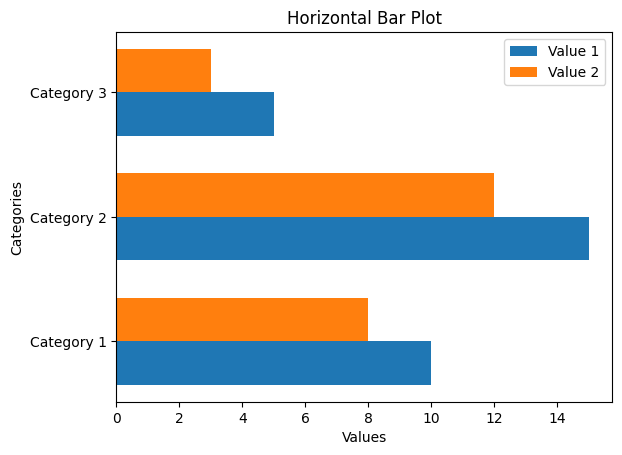

In [157]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
categories = ['Category 1', 'Category 2', 'Category 3']
values1 = [10, 15, 5]
values2 = [8, 12, 3]

# Set the width of the bars
bar_width = 0.35

# Calculate the position of the bars on the y-axis
y_pos = np.arange(len(categories))

# Create the first set of bars
plt.barh(y_pos, values1, height=bar_width, label='Value 1')

# Create the second set of bars with adjusted positions
plt.barh(y_pos + bar_width, values2, height=bar_width, label='Value 2')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Categories')
plt.title('Horizontal Bar Plot')

# Adjust the y-axis ticks and labels
plt.yticks(y_pos + bar_width / 2, categories)

# Display the legend
plt.legend()

# Display the plot
plt.show()

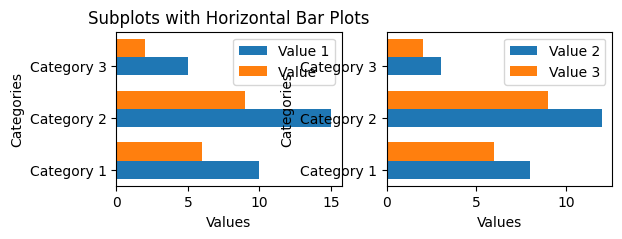

In [158]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
categories = ['Category 1', 'Category 2', 'Category 3']
values1 = [10, 15, 5]
values2 = [8, 12, 3]
values3 = [6, 9, 2]

# Set the width of the bars
bar_width = 0.35

# Calculate the position of the bars on the y-axis
y_pos = np.arange(len(categories))

# Create the first subplot for the first set of values
plt.subplot(2, 2, 1)
plt.barh(y_pos, values1, height=bar_width, label='Value 1')
plt.barh(y_pos + bar_width, values3, height=bar_width, label='Value ')
plt.xlabel('Values')
plt.ylabel('Categories')
plt.title('Subplots with Horizontal Bar Plots')
plt.yticks(y_pos, categories)
plt.legend()

# Create the second subplot for the second set of values
plt.subplot(2, 2, 2)
plt.barh(y_pos, values2, height=bar_width, label='Value 2')
plt.barh(y_pos + bar_width, values3, height=bar_width, label='Value 3')
plt.xlabel('Values')
plt.ylabel('Categories')
plt.yticks(y_pos, categories)
plt.legend()

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.4)

# Display the plot
plt.show()


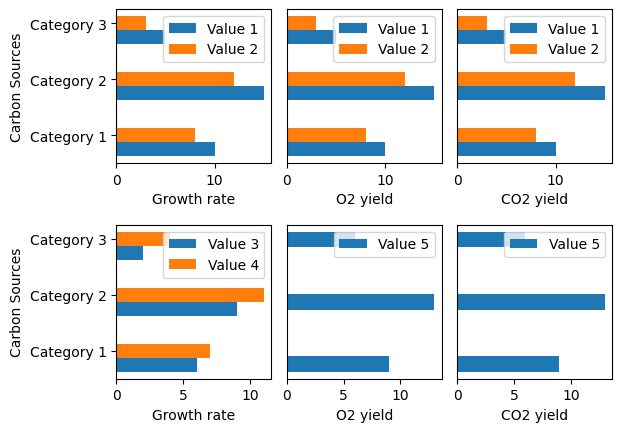

In [159]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data

categories = ['Category 1', 'Category 2', 'Category 3']
values1 = [10, 15, 5]
values2 = [8, 12, 3]
values3 = [6, 9, 2]
values4 = [7, 11, 4]
values5 = [9, 13, 6]

# Set the width of the bars
bar_width = 0.25

# Calculate the position of the bars on the y-axis
y_pos = np.arange(len(categories))

# Create the first subplot for the first set of values
plt.subplot(2, 3, 1)
plt.barh(y_pos - bar_width, values1, height=bar_width, label='Value 1')
plt.barh(y_pos, values2, height=bar_width, label='Value 2')
plt.xlabel('Growth rate')
plt.ylabel('Carbon Sources')
plt.title('')
plt.yticks(y_pos, categories)
plt.legend()

# Create the first subplot for the first set of values
plt.subplot(2, 3, 2)
plt.barh(y_pos - bar_width, values1, height=bar_width, label='Value 1')
plt.barh(y_pos, values2, height=bar_width, label='Value 2')
plt.xlabel('O2 yield')
plt.yticks([])
plt.legend()

# Create the first subplot for the first set of values
plt.subplot(2, 3, 3)
plt.barh(y_pos - bar_width, values1, height=bar_width, label='Value 1')
plt.barh(y_pos, values2, height=bar_width, label='Value 2')
plt.xlabel('CO2 yield')
plt.yticks([])
plt.legend()

# Create the second subplot for the second set of values
plt.subplot(2, 3, 4)
plt.barh(y_pos - bar_width, values3, height=bar_width, label='Value 3')
plt.barh(y_pos, values4, height=bar_width, label='Value 4')
plt.xlabel('Growth rate')
plt.ylabel('Carbon Sources')
plt.yticks(y_pos, categories)
plt.legend()

# Create the third subplot for the additional set of values
plt.subplot(2, 3, 5)
plt.barh(y_pos, values5, height=bar_width, label='Value 5')
plt.xlabel('O2 yield')
plt.yticks([])
plt.legend()

# Create the third subplot for the additional set of values
plt.subplot(2, 3, 6)
plt.barh(y_pos, values5, height=bar_width, label='Value 5')
plt.xlabel('CO2 yield')
plt.yticks([])
plt.legend()

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.4)

# Display the plot
plt.show()


#### Legend of subplots (row only one legend)

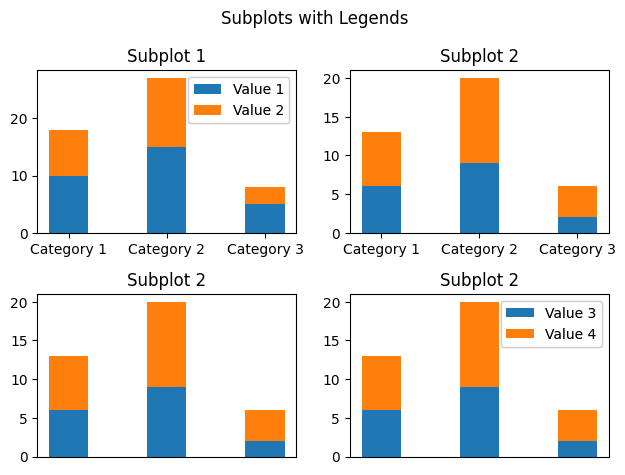

In [160]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
categories = ['Category 1', 'Category 2', 'Category 3']
values1 = [10, 15, 5]
values2 = [8, 12, 3]
values3 = [6, 9, 2]
values4 = [7, 11, 4]

# Set the width of the bars
bar_width = 0.4

# Calculate the position of the bars on the x-axis
x_pos = np.arange(len(categories))

# Create the figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=2)

# Plot the first subplot
axes[0, 0].bar(x_pos, values1, width=bar_width, label='Value 1')
axes[0, 0].bar(x_pos, values2, width=bar_width, bottom=values1, label='Value 2')
axes[0, 0].set_xticks(x_pos)
axes[0, 0].set_xticklabels(categories)
axes[0, 0].set_title('Subplot 1')

# Plot the second subplot
axes[0, 1].bar(x_pos, values3, width=bar_width, label='Value 3')
axes[0, 1].bar(x_pos, values4, width=bar_width, bottom=values3, label='Value 4')
axes[0, 1].set_xticks(x_pos)
axes[0, 1].set_xticklabels(categories)
axes[0, 1].set_title('Subplot 2')

# Plot the third subplot
axes[1, 0].bar(x_pos, values3, width=bar_width, label='Value 3')
axes[1, 0].bar(x_pos, values4, width=bar_width, bottom=values3, label='Value 4')
axes[1, 0].set_xticks(x_pos)
axes[1, 0].set_xticklabels(categories)
axes[1, 0].set_title('Subplot 2')

# Plot the forth subplot
axes[1, 1].bar(x_pos, values3, width=bar_width, label='Value 3')
axes[1, 1].bar(x_pos, values4, width=bar_width, bottom=values3, label='Value 4')
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels(categories)
axes[1, 1].set_title('Subplot 2')

# Hide tick labels on x-axis for the second row subplots
axes[1, 0].set_xticks([])
axes[1, 1].set_xticks([])

# Create the legend for the first row
legend1 = axes[0, 0].legend(loc='upper right')
legend2 = axes[1, 1].legend(loc='upper right')

# Add the legend to the first row subplots
axes[0, 0].add_artist(legend1)
axes[1, 1].add_artist(legend2)

# Set the title for the entire figure
fig.suptitle('Subplots with Legends')

# Adjust the spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()


### Plotting of the data

#### Many models

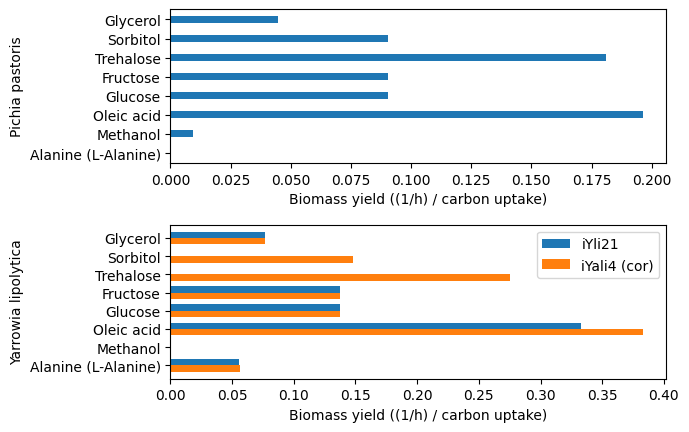

In [178]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
# Alanine: L-Alanine (second frequent AS), Methanol, Oleic acid, Glucose, Fructose, Trehalose, Sorbitol, Glycerol, CO2 productio, O2 production

carbon_sources = ['Alanine (L-Alanine)', 'Methanol', 'Oleic acid', 'Glucose', 'Fructose', 'Trehalose', 'Sorbitol', 'Glycerol']
biomass_yield_yli21 = iYli21_simulation_growth
co2_yield_yli21 = iYli21_simulation_co2
o2_yield_yli21 = iYli21_simulation_o2

biomass_yield_iYali4 = _yali4_biomass_yield
co2_yield_iYali4 = [8, 12, 3, 8, 12, 3, 8, 12]
o2_yield_iYali4 = [8, 12, 3, 8, 12, 3, 8, 12]

# growth_iLC915 = [6, 9, 3, 2, 9, 5, 6, 9]
# o2_yield_iLC915 = [6, 9, 3, 2, 9, 5, 6, 9]
# co2_yield_iLC915 = [6, 9, 3, 2, 9, 5, 6, 9]

biomass_yield_iMT1026v3 = iMT1026v3_simulation_growth
o2_yield_iMT1026v3 = iMT1026v3_simulation_o2_prod
co2_yield_iMT1026v3 = iMT1026v3_simulation_co2_prod

# Set the width of the bars
bar_width = 0.35

# Calculate the position of the bars on the y-axis
y_pos = np.arange(len(carbon_sources))
## PPA
ppa_model_labels = ['iLC915', 'iMT1026v3']

# Create the first subplot for growth of ppa (iLC915 vs iMT1026v3)
plt.subplot(2, 1, 1)
# plt.barh(y_pos - bar_width, growth_iLC915, height=bar_width, label=ppa_model_labels[0])
plt.barh(y_pos, biomass_yield_iMT1026v3, height=bar_width, label=ppa_model_labels[1])
plt.xlabel('Biomass yield ((1/h) / carbon uptake)')
plt.ylabel('Pichia pastoris')
plt.title('')
plt.yticks(y_pos, carbon_sources)

# # Create the first subplot for O2 yield of Ppa (iLC915 vs iMT1026v3)
# plt.subplot(2, 3, 2)
# plt.barh(y_pos - bar_width, o2_yield_iLC915, height=bar_width, label=ppa_model_labels[0])
# plt.barh(y_pos, o2_yield_iMT1026v3, height=bar_width, label=ppa_model_labels[1])
# plt.xlabel('O2 yield')
# plt.yticks([])

# # Create the first subplot for CO2 yield of Ppa (iLC915 vs iMT1026v3)
# plt.subplot(2, 3, 3)
# plt.barh(y_pos - bar_width, co2_yield_iLC915, height=bar_width, label=ppa_model_labels[0])
# plt.barh(y_pos, co2_yield_iMT1026v3, height=bar_width, label=ppa_model_labels[1])
# plt.xlabel('CO2 yield')
# plt.yticks([])

## Yali
yli_model_labels = ['iYli21', 'iYali4 (cor)']
# Create the first subplot growth of yli (iYli21 vs iYali4)
plt.subplot(2, 1, 2)
plt.barh(y_pos + bar_width/2, biomass_yield_yli21, height=bar_width, label=yli_model_labels[0])
plt.barh(y_pos - bar_width/2, biomass_yield_iYali4, height=bar_width, label=yli_model_labels[1])
plt.xlabel('Biomass yield ((1/h) / carbon uptake)')
plt.ylabel('Yarrowia lipolytica')
plt.title('')
plt.yticks(y_pos, carbon_sources)
plt.legend()

# # Create the second subplot for O2 yield of yli (iYli21 vs iYali4)
# plt.subplot(2, 3, 5)
# plt.barh(y_pos - bar_width, o2_yield_yli21, height=bar_width, label=ppa_model_labels[0])
# plt.barh(y_pos, o2_yield_iYali4, height=bar_width, label=yli_model_labels[1])
# plt.xlabel('O2 yield')
# plt.yticks([])

# # Create the first subplot for CO2 yield of yli (iYli21 vs iYali4)
# plt.subplot(2, 3, 6)
# plt.barh(y_pos, co2_yield_yli21, height=bar_width, label=yli_model_labels[0])
# plt.barh(y_pos + bar_width, co2_yield_iYali4, height=bar_width, label=yli_model_labels[1])
# plt.xlabel('CO2 yield')
# plt.yticks([])


# # legend: 
# # Create the legend for the first row
# legend1 = axes[0, 0].legend(loc='upper right')
# legend2 = axes[1, 0].legend(loc='upper right')

# # Add the legend to the first row subplots
# axes[0, 0].add_artist(legend1)
# axes[1, 1].add_artist(legend2)

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.4)

# Display the plot
plt.show()

#### One model each species

In [162]:
print(biomass_yield_iMT1026v3)
print(biomass_yield_yli21)

NameError: name 'biomass_yield_iMT1026v3' is not defined

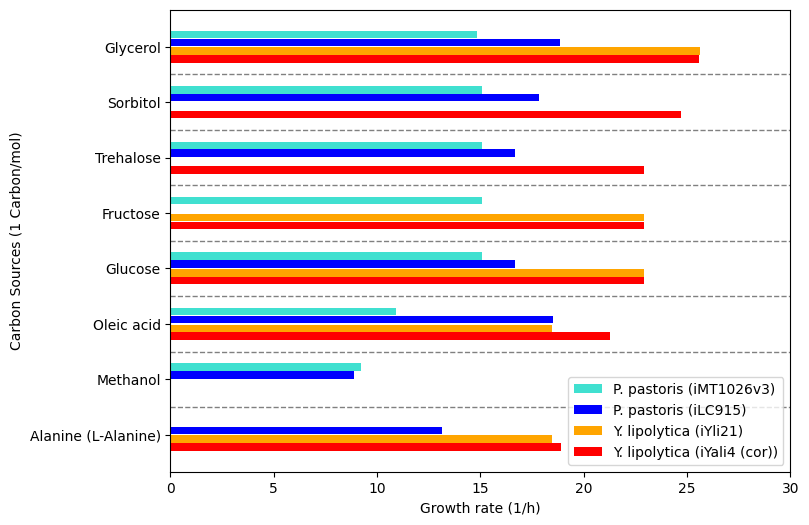

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
# Alanine: L-Alanine (second frequent AS), Methanol, Oleic acid, Glucose, Fructose, Trehalose, Sorbitol, Glycerol, CO2 productio, O2 production

carbon_sources = ['Alanine (L-Alanine)', 'Methanol', 'Oleic acid', 'Glucose', 'Fructose', 'Trehalose', 'Sorbitol', 'Glycerol']

biomass_yield_yli21 = iYli21_simulation_biomass_yield # [0.0554, 0.3326, 0.1376, 0.1376, 0, 0, 0.0768]
growth_yli21 = iYli21_simulation_growth # [18.4807, 0, 18.4804, 22.9298, 22.9298, 0, 0, 25.6036]
co2_yield_yli21 = iYli21_simulation_co2
o2_yield_yli21 = iYli21_simulation_o2

# biomass_yield_yali4 = _yali4_biomass_yield
biomass_yield_yali4 = [0.0568, 0, 0.3829, 0.1374, 0.1374, 0.2749, 0.1483, 0.0767]
# growth_yali4 = _yali4_growth_rate
growth_yali4 = [18.9218, 0, 21.2723, 22.9068, 22.9068, 22.9097, 24.7162, 25.5554]
# co2_yield_iYali4 = [8, 12, 3, 8, 12, 3, 8, 12]
# o2_yield_iYali4 = [8, 12, 3, 8, 12, 3, 8, 12]

growth_iLC915 = iLC915_growth # [13.1491, 8.8747, 18.5102, 16.6677, 0, 16.67, 17.859, 18.8556]
biomass_yield_iLC915 = iLC915_biomass_ylied # [0.0394, 0.0089, 0.3332, 0.1, 0, 0.2, 0.1072, 0.0566]
# o2_yield_iLC915 = [6, 9, 3, 2, 9, 5, 6, 9]
# co2_yield_iLC915 = [6, 9, 3, 2, 9, 5, 6, 9]

growth_iMT1026v3 = iMT1026v3_simulation_growth # [0, 9.226, 10.9062, 15.0914, 15.0914, 15.0952, 15.0914, 14.8574]
biomass_yield_iMT1026v3 = iMT1026v3_simulation_biomass_yield # [0, 0.0092, 0.1963, 0.0905, 0.0905, 0.1811, 0.0905, 0.0446]
o2_yield_iMT1026v3 = iMT1026v3_simulation_o2_prod
co2_yield_iMT1026v3 = iMT1026v3_simulation_co2_prod

# Set the width of the bars
bar_width = 0.2

# Calculate the position of the bars on the y-axis
y_pos = np.arange(len(carbon_sources))

model_names = ['Y. lipolytica (iYali4 (cor))', 'Y. lipolytica (iYli21)', 'P. pastoris (iMT1026v3)', 'P. pastoris (iLC915)']

# Set the figure size
plt.figure(figsize=(8, 6))  # Adjust the values (width, height) as desired

# Create the first subplot for growth of ppa (iLC915 vs iMT1026v3)
plt.barh(y_pos + bar_width/0.9, growth_iMT1026v3, height=bar_width/1.5, label=model_names[2], color='turquoise')
plt.barh(y_pos + bar_width/2.5, growth_iLC915, height=bar_width/1.5, label=model_names[3], color='blue')
plt.barh(y_pos - bar_width/2.5, growth_yli21, height=bar_width/1.5, label=model_names[1], color='orange')
plt.barh(y_pos - bar_width/0.9, growth_yali4, height=bar_width/1.5, label=model_names[0], color='red')

# Add horizontal lines
for i in range(len(carbon_sources) - 1):
    plt.axhline(y=i+0.5, color='gray', linestyle='--', linewidth=1)

# fix x axis limit to 30
plt.xlim(0, 30)

plt.xlabel('Growth rate (1/h)')
plt.ylabel('Carbon Sources (1 Carbon/mol)')
plt.title('')
plt.yticks(y_pos, carbon_sources)
plt.legend(loc='lower right')
fig1 = plt.gcf()
plt.show()
# store the figure in good quality in ../results/FBA_results/growth_rate_plots/ folder with the name: Ppa_Yli_biomass_yield_different_carbons.png
fig1.savefig('../results/FBA_results/growth_rate_plots/Ppa_Yli_biomass_yield_different_carbons.png', dpi=300, bbox_inches='tight')